# Compare Simple vs. Log Returns

In this notebook we:
- Load minute-level price data.
- Compute simple (arithmetic) returns and log returns.
- Compare their statistical properties and plots.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [32]:
# Load 1-minute BNB/USDT price data
df = pd.read_csv(
    '/Users/mchildress/Active Code/ts_basics/data/bnbusdt_1m.csv',
    parse_dates=['open_time'],
    index_col='open_time'
)
price = df['close']

In [33]:
# Compute returns
simple_ret = price.pct_change().dropna()
log_ret = np.log(price / price.shift(1)).dropna()

In [34]:
print("Simple Returns:")
display(simple_ret.describe())
print("\nLog Returns:")
display(log_ret.describe())

Simple Returns:


count    3.675431e+06
mean     2.276448e-06
std      1.465837e-03
min     -9.810169e-02
25%     -4.668534e-04
50%      0.000000e+00
75%      4.781486e-04
max      1.124267e-01
Name: close, dtype: float64


Log Returns:


count    3.675431e+06
mean     1.202207e-06
std      1.465767e-03
min     -1.032535e-01
25%     -4.669624e-04
50%      0.000000e+00
75%      4.780343e-04
max      1.065439e-01
Name: close, dtype: float64

### Comparative Descriptive Statistics

- **Average Return**: The simple returns (mean ≈ 2.28e-06) slightly exceed the log returns (mean ≈ 1.20e-06), because log returns reflect continuously compounded growth which tempers large upward moves.
- **Volatility**: Both metrics share nearly identical standard deviations (≈ 1.4658e-03), indicating that over 1-minute intervals, fluctuation magnitudes are the same whether measured arithmetically or logarithmically.
- **Extreme Moves**: The maximum simple return (+11.43%) is larger than the maximum log return (+10.65%), and the minimum log return (–10.33%) is slightly more extreme than the minimum simple return (–9.81%). This shows simple returns tend to overstate large gains and understate large losses relative to log returns.
- **Distributional Insight**: The near-identical quartiles (25%/50%/75%) confirm both measures capture the same core distribution, but logarithmic scaling compresses positive outliers and accentuates negative ones slightly.


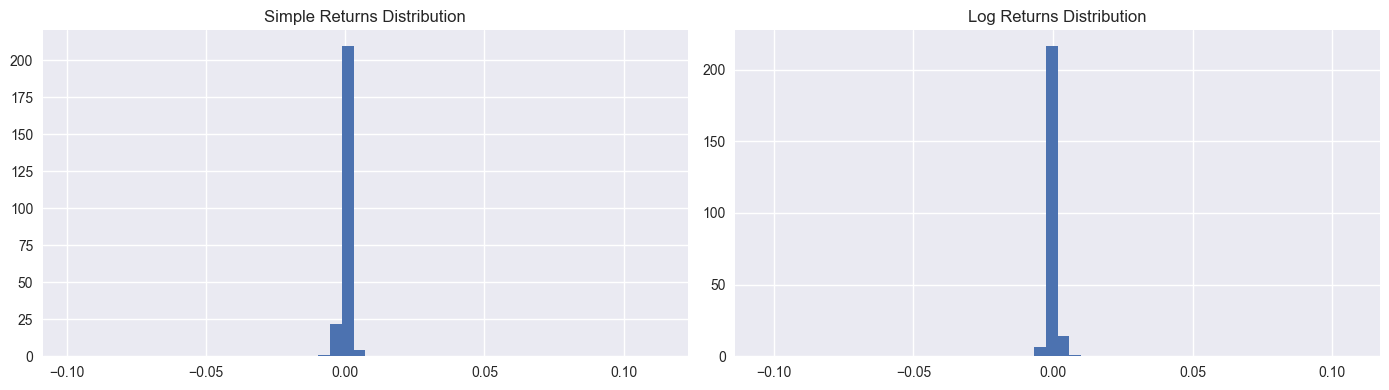

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
simple_ret.hist(bins=50, ax=axes[0], density=True)
axes[0].set_title("Simple Returns Distribution")
log_ret.hist(bins=50, ax=axes[1], density=True)
axes[1].set_title("Log Returns Distribution")
plt.tight_layout()

### Interpretation of Distributions and Cumulative Plots

Although the histograms of simple and log returns look nearly identical—both tightly centered around zero with long, thin tails—the subtle differences highlight how log returns mildly compress extreme positive moves and slightly accentuate large negative moves. In practice this means log returns are more symmetric and better suited for statistical modeling that assumes normality.

Similarly, the cumulative return curves for simple returns and log returns overlay almost perfectly over short horizons. Divergence only appears during large jumps, where the simple curve spikes slightly higher on big gains and slightly lower on big losses. Over long periods, these differences compound, so for multi-period aggregation and portfolio optimization, log returns provide more accurate, time-additive behavior.

Data is almost identical most of the time:

Since one-minute price changes are tiny, both “percent change” (simple) and “log change” (log) give you virtually the same numbers for normal ticks.

When there’s an abrupt jump up, simple returns show exactly that jump, while log returns will pull it in slightly. Conversely, on a sudden crash, log returns will push the drop a bit further out, like 5% would become 5.1% or so.

We can string returns together over many minutes or days, log returns are just sums—you can literally add them up. Simple returns multiply.

We would want to look at simple retuns when we want a straight perfect gain or loss between points in time. Would be good for communicating P&L data to non technical types. 
We would want log returns when returns need to be added up cleanly over time and we care about continuously compounded growth, like for risk modeling, portfolio optimization, and option pricing (I do not understand options, but my boss at work is always talking about them and compounded growth).

In short, simple returns are headline numbers, but for the ML and analytics of things we would want log.

In [36]:
# percentage (simple) returns
df['simple'] = df['close'].pct_change().fillna(0)

# log returns
df['log'] = np.log(df['close'] / df['close'].shift(1)).fillna(0)

# cumulative series
cum_simple = (1 + df['simple']).cumprod()
cum_log    = np.exp(df['log'].cumsum())

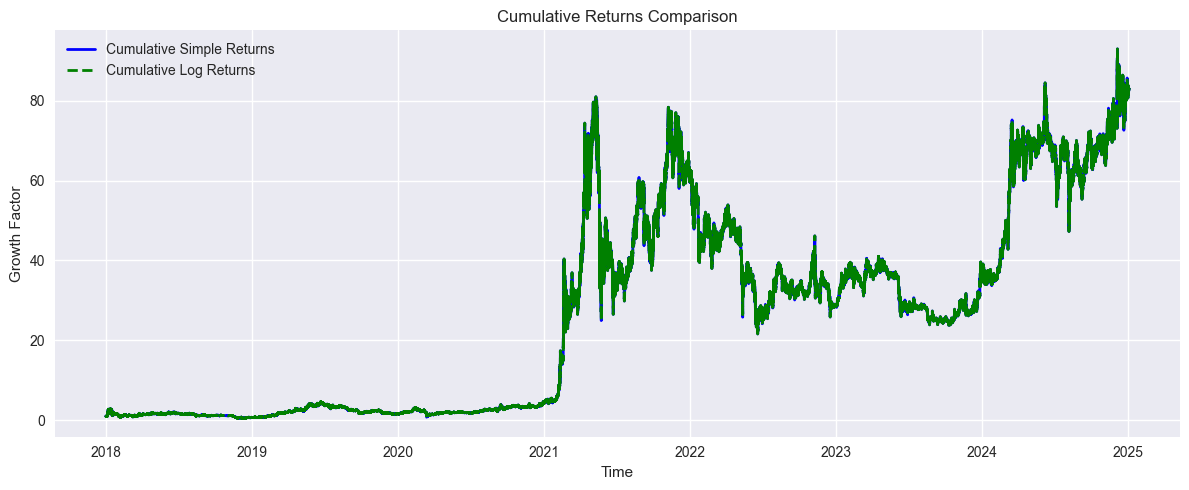

In [37]:
plt.figure(figsize=(12,5))

# plot simple returns in solid blue, slightly thicker
plt.plot(cum_simple,
         color='blue',
         linestyle='-',
         linewidth=2,
         label='Cumulative Simple Returns')

# plot log returns in dashed green
plt.plot(cum_log,
         color='green',
         linestyle='--',
         linewidth=2,
         label='Cumulative Log Returns')

plt.title("Cumulative Returns Comparison")
plt.xlabel("Time")
plt.ylabel("Growth Factor")
plt.legend()
plt.tight_layout()
plt.show()

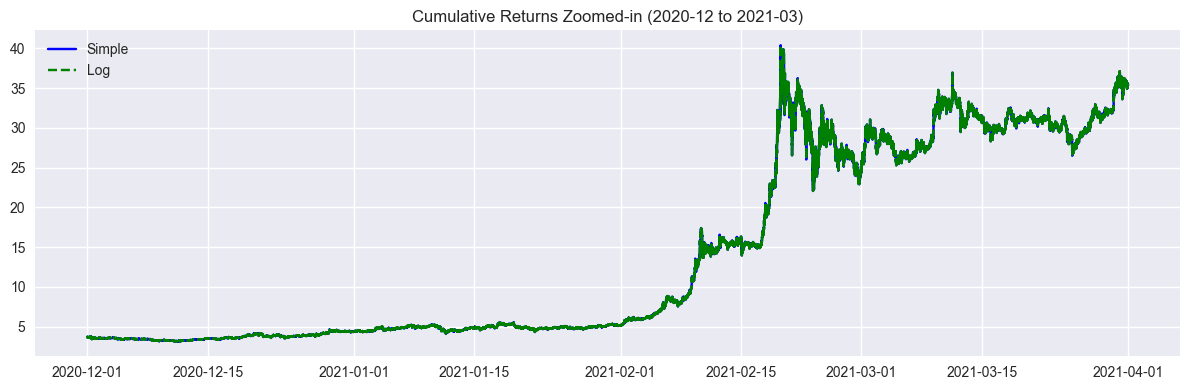

In [38]:
plt.figure(figsize=(12,4))
start, end = '2020-12', '2021-03'
plt.plot(cum_simple.loc[start:end], color='blue', label='Simple')
plt.plot(cum_log.loc   [start:end], color='green', linestyle='--', label='Log')
plt.title(f"Cumulative Returns Zoomed-in ({start} to {end})")
plt.legend(); plt.tight_layout(); plt.show()

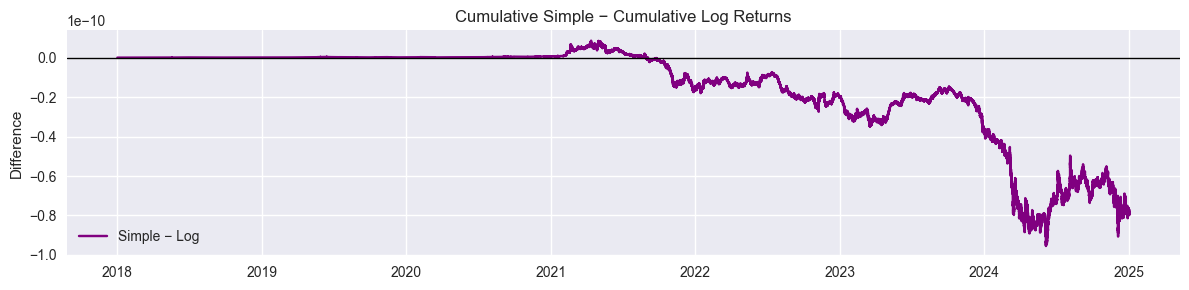

In [39]:
diff = cum_simple - cum_log
plt.figure(figsize=(12,3))
plt.plot(diff, color='purple', label='Simple − Log')
plt.axhline(0, color='black', lw=1)
plt.title("Cumulative Simple − Cumulative Log Returns")
plt.ylabel("Difference")
plt.legend(); plt.tight_layout(); plt.show()